<h1>I. Import libraries </h1>

In [37]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score


<h1> II. Define functions</h1>

Define the function to draw horizontal barplot

In [7]:
def draw_barplot_horizontal(name,value,fig_width=16,fig_height=20,title=''):
    fig, ax = plt.subplots(figsize =(fig_width, fig_height))

    # Horizontal Bar Plot
    ax.barh(name, value)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')


    ax.set_title(title,
                 loc ='left', )

    # Add Text watermark
    fig.text(0.9, 0.15,'MiBA_A10', fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)

    # Show Plot
    plt.show()

In [52]:

def cross_validation_compas(compas_pipe, X_train, y_train,scoring='r2'):
    scores = cross_val_score(compas_pipe, X_train, y_train, cv = 5,scoring=scoring)
    return scores.mean()

<h1>III. Import dataset</h1>

Import dataset and have a basic look

In [9]:
listings = pd.DataFrame(pd.read_csv("./Dataset/listings.csv"))
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,2.021120e+13,2021/12/8,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.90,4.71,4.29,HUTB-002062,t,19,19,0,0,0.21
1,23197,https://www.airbnb.com/rooms/23197,2.021120e+13,2021/12/8,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.98,4.66,4.67,HUTB-005057,f,2,2,0,0,0.41
2,32711,https://www.airbnb.com/rooms/32711,2.021120e+13,2021/12/8,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.79,4.81,4.40,HUTB-001722,t,3,3,0,0,0.50
3,34981,https://www.airbnb.com/rooms/34981,2.021120e+13,2021/12/7,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.73,4.47,HUTB-001506,f,2,2,0,0,1.17
4,35318,https://www.airbnb.com/rooms/35318,2.021120e+13,2021/12/7,Luxury room with private bathroom and balcony,"Luxury Room with King Size bed, private bathro...",The Gothic Quarter of Barcelona. One of the ol...,https://a0.muscache.com/pictures/miso/Hosting-...,152070,https://www.airbnb.com/users/show/152070,...,4.83,4.81,4.68,NaN,t,1,0,1,0,1.89


<h1>IV. Data cleaning</h1>

In [10]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [11]:
keep_var = ['id', 'name', 'description',
       'neighborhood_overview', 
       'host_is_superhost','neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights',   'number_of_reviews','availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']
listings_cleaned = listings.loc[:,keep_var]
listings_cleaned.shape

(15707, 29)

To see whether we have dupulicated rows

In [12]:
listings_cleaned.duplicated().sum()

0

To check missing variables

In [13]:
listings_cleaned.isnull().sum() 

id                                 0
name                              10
description                       92
neighborhood_overview           6519
host_is_superhost                 36
neighbourhood                   6519
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    17
bedrooms                         593
beds                             697
amenities                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
availability_365                   0
review_scores_rating            4084
review_scores_accuracy          4232
review_scores_cleanliness       4230
review_scores_checkin           4236
review_scores_communication     4231
review_scores_location          4237
r

In [14]:
listings_cleaned.dropna(subset=['name','bathrooms_text', 'bedrooms', 'beds'], inplace=True)

In [15]:
listings_cleaned['neighborhood_overview'].fillna(value='', inplace=True)
listings_cleaned['neighbourhood'].fillna(value='', inplace=True)
listings_cleaned['description'].fillna(value='', inplace=True)

In [16]:
listings_cleaned['host_is_superhost'].fillna(value='f', inplace=True)

In [17]:
listings_cleaned['price']

0        $102.00
1        $220.00
2        $144.00
3        $214.00
4         $93.00
          ...   
15701     $48.00
15702     $47.00
15703     $53.00
15704     $53.00
15706     $54.00
Name: price, Length: 14446, dtype: object

In [18]:
listings_cleaned['price'] = listings_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_cleaned['price']

0        102.0
1        220.0
2        144.0
3        214.0
4         93.0
         ...  
15701     48.0
15702     47.0
15703     53.0
15704     53.0
15706     54.0
Name: price, Length: 14446, dtype: float64

In [19]:
# listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.replace('$', '').str.replace(',', '').astype(float)
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('([0-9][.]*[0-9]*)').astype(float)
listings_cleaned['bathrooms'].fillna(0, inplace=True)


In [20]:
listings_cleaned['price'].describe()

count    14446.000000
mean       100.585906
std        224.481976
min          8.000000
25%         40.000000
50%         70.000000
75%        111.000000
max       9999.000000
Name: price, dtype: float64

<AxesSubplot:>

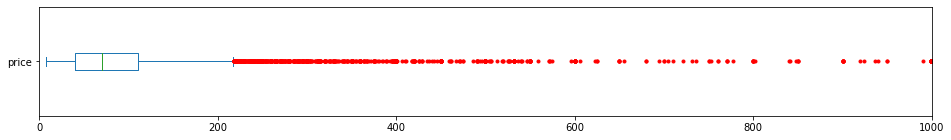

In [21]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
listings_cleaned['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2))

In [ ]:
listings_cleaned.drop(listings_cleaned[ (listings_cleaned['price'] > 400) | (listings_cleaned['price'] == 0) ].index, axis=0, inplace=True)


In [22]:
neighbourhood_cleansed = listings_cleaned.groupby(by = 'neighbourhood_cleansed').mean()['price'].sort_values(ascending=False).to_dict()

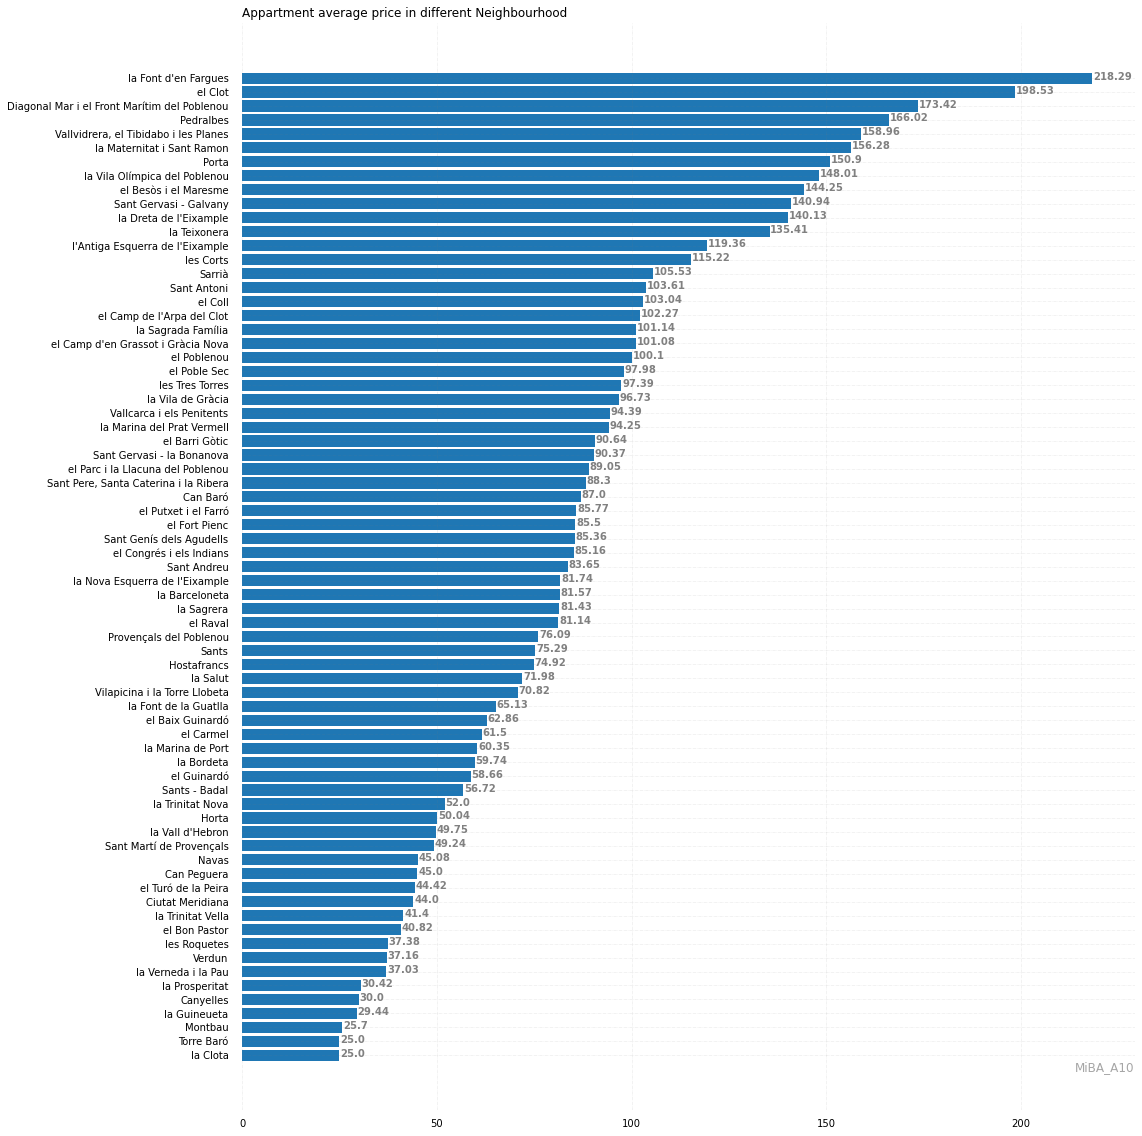

In [24]:
draw_barplot_horizontal(list(neighbourhood_cleansed.keys()), 
                        list(neighbourhood_cleansed.values()),
                        title='Appartment average price in different Neighbourhood')

In [25]:
listings_cleaned['property_type'].value_counts()

Entire rental unit                     6752
Private room in rental unit            4866
Entire serviced apartment               363
Entire condominium (condo)              245
Private room in condominium (condo)     207
Room in boutique hotel                  206
Private room in residential home        195
Room in hotel                           186
Entire loft                             175
Private room in hostel                  148
Shared room in rental unit               90
Shared room in hostel                    80
Private room in serviced apartment       73
Private room in guest suite              71
Entire residential home                  61
Private room in bed and breakfast        61
Private room in loft                     46
Room in hostel                           40
Entire guest suite                       39
Room in serviced apartment               29
Private room in casa particular          28
Boat                                     23
Entire guesthouse               

In [26]:
listings_cleaned.drop(listings_cleaned[ (listings_cleaned['property_type'] != 'Entire rental unit') & (listings_cleaned['property_type'] != 'Private room in rental unit') ].index, axis=0, inplace=True)

In [27]:
listings_cleaned['size'] = listings_cleaned['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
listings_cleaned['size'] = listings_cleaned['size'].str.replace("\D", "").astype(float)
listings_cleaned['size']

0        110.0
1          NaN
2        250.0
3        115.0
5          NaN
         ...  
15701     34.0
15702     30.0
15703     30.0
15704     30.0
15706     30.0
Name: size, Length: 11618, dtype: float64

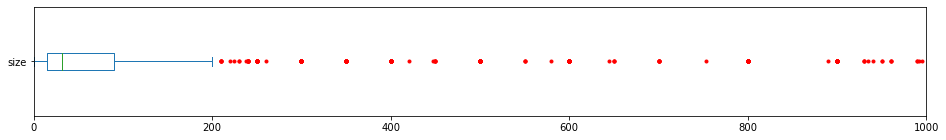

In [28]:
listings_cleaned['size'].describe()
listings_cleaned['size'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2))
listings_cleaned.drop(listings_cleaned[ (listings_cleaned['size'] > 200) | (listings_cleaned['size'] == 0) ].index, axis=0, inplace=True)


In [29]:
listings_cleaned['accommodates'] = listings_cleaned['accommodates'].astype(float)

In [30]:
listings_cleaned.isnull().sum() 

id                                 0
name                               0
description                        0
neighborhood_overview              0
host_is_superhost                  0
neighbourhood                      0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
availability_365                   0
review_scores_rating            2647
review_scores_accuracy          2756
review_scores_cleanliness       2754
review_scores_checkin           2758
review_scores_communication     2754
review_scores_location          2757
r

<h1>V. Data engineering</h1>

In [173]:
!conda install geopy.distance

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - geopy.distance

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [172]:
from geopy.distance import great_circle
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km
a= listings_cleaned.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

ModuleNotFoundError: No module named 'geopy'

In [161]:
listings_cleaned_size = listings_cleaned.loc[~listings_cleaned['size'].isnull(),['bedrooms','beds','bathrooms','accommodates','size','property_type','neighbourhood_group_cleansed']]


In [162]:
listings_cleaned_size.isna().sum()

bedrooms                        0
beds                            0
bathrooms                       0
accommodates                    0
size                            0
property_type                   0
neighbourhood_group_cleansed    0
dtype: int64

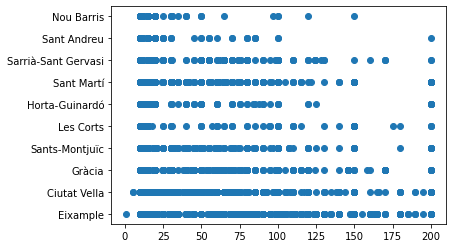

In [171]:
plt.scatter(listings_cleaned_size['size'],listings_cleaned_size['neighbourhood_group_cleansed'])

In [73]:
listings_cleaned['neighbourhood_group_cleansed'].value_counts()
# 'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed'

Eixample               4053
Ciutat Vella           2566
Sants-Montjuïc         1272
Sant Martí             1105
Gràcia                  994
Sarrià-Sant Gervasi     417
Horta-Guinardó          344
Les Corts               234
Sant Andreu             181
Nou Barris              156
Name: neighbourhood_group_cleansed, dtype: int64

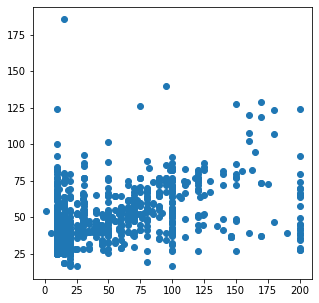

0.13551283847538778

In [76]:
X = listings_cleaned_size.drop(columns='size')
y = listings_cleaned_size['size']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=0.8,test_size=0.2)
categorical_features = ['property_type','neighbourhood_group_cleansed']
transformer = ColumnTransformer([('ohe',OneHotEncoder(sparse=False),categorical_features)], remainder='passthrough')
pipeline_steps = [('preprocess', transformer),('scaler', StandardScaler()),('ml_model', LinearRegression())]
pipe = Pipeline(pipeline_steps)
pipe.fit(X_train,y_train)



y_pred = pipe.predict(X_test)


fig, ax = plt.subplots(figsize =(5, 5))
plt.scatter(y_test,y_pred)
plt.xlim=(0,200)
plt.ylim=(0,200)

plt.show()

cross_validation_compas(pipe,X_train,y_train,scoring='r2')


